# Project 4: Multi-factor Model
## Instructions
Each problem consists of a function to implement and instructions on how to implement the function.  The parts of the function that need to be implemented are marked with a `# TODO` comment. After implementing the function, run the cell to test it against the unit tests we've provided. For each problem, we provide one or more unit tests from our `project_tests` package. These unit tests won't tell you if your answer is correct, but will warn you of any major errors. Your code will be checked for the correct solution when you submit it to Udacity.

## Packages
When you implement the functions, you'll only need to you use the packages you've used in the classroom, like [Pandas](https://pandas.pydata.org/) and [Numpy](http://www.numpy.org/). These packages will be imported for you. We recommend you don't add any import statements, otherwise the grader might not be able to run your code.

The other packages that we're importing are `project_helper` and `project_tests`. These are custom packages built to help you solve the problems.  The `project_helper` module contains utility functions and graph functions. The `project_tests` contains the unit tests for all the problems.

### Install Packages
You can view the list of packages to install, as mentioned in `requirements.txt` as:

`! cat requirements.txt` 

In [1]:
%%capture
%run 00_portopt_data.ipynb

In [2]:
import datetime as dt

from tqdm import tqdm

from src.portfolio_opt import cvx_opt_tc

### Load Packages

In [3]:
RND_SEED = 123
STR_DATE_FMT = "%Y%m%d"

# Statistical Risk Model

In [4]:
risk_model.keys()

dict_keys(['idiosyncratic_var_vector', 'factor_var_vector', 'factor_betas', 'factor_returns'])

In [5]:
risk_model['factor_betas'].shape

(490, 20)

In [6]:
risk_model['factor_cov_matrix'] = np.diag(risk_model['factor_var_vector']['0'].values)
risk_model['factor_cov_matrix'].shape

(20, 20)

In [7]:
risk_model['idiosyncratic_var_vector'].shape

(490, 1)

# Alpha Vector

In [17]:
alpha_vector = B_alpha['ml_alpha']

In [13]:
def combi_series(x, y, fill_value=0.0):
    choose_left = lambda x, y: x
    w = x.combine(y, func=choose_left, fill_value=fill_value)
    w = w[y.index]
    return w

In [18]:
alpha_vector

date                       asset
2015-05-26 00:00:00+00:00  A        0.881216
                           AAL      1.705349
                           AAP      0.363903
                           AAPL     1.109547
                           ABBV     1.255822
                                      ...   
2015-12-28 00:00:00+00:00  XYL     -0.391964
                           YUM      1.324202
                           ZBH     -1.592573
                           ZION     1.077018
                           ZTS     -0.568524
Name: ml_alpha, Length: 73655, dtype: float64

In [15]:
w_prev

date                       asset
2015-05-26 00:00:00+00:00  A        0.0
dtype: float64

In [20]:
#r = combi_series(x=w_prev, y=alpha_vector, fill_value=0.0)

In [21]:
alpha_vector

asset
A       0.881216
AAL     1.705349
AAP     0.363903
AAPL    1.109547
ABBV    1.255822
          ...   
XYL    -1.127385
YUM     0.806295
ZBH    -0.899054
ZION   -0.121301
ZTS     0.428121
Name: , Length: 485, dtype: float64

In [22]:
w_prev

date                       asset
2015-05-26 00:00:00+00:00  A        0.0
dtype: float64

In [24]:
bkt_dt_set[0]

Timestamp('2015-05-26 00:00:00+0000', tz='UTC')

In [27]:
from src.mle_quant_utils import portopt_utils

In [29]:
risk_model['factor_betas'].loc[]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
A,-0.042628,0.014983,0.012869,0.003801,-0.022948,0.010030,-0.004048,-0.006718,-0.034471,0.024555,-0.017108,0.018875,0.025266,0.014909,-0.026406,0.033897,-0.029173,-0.030546,-0.026341,-0.012199
AAL,-0.060402,0.258601,-0.037516,0.144527,0.296615,-0.080756,0.113555,-0.024766,-0.161712,-0.035469,0.043421,0.100238,-0.014771,-0.026967,0.015362,0.025396,-0.013467,-0.056342,0.067339,0.092211
AAP,-0.032853,0.040875,-0.013243,-0.027455,-0.013848,-0.023490,-0.045884,-0.022921,-0.012474,-0.012164,0.073948,0.009309,-0.062079,0.022235,-0.013026,0.036678,0.049647,0.023076,-0.056801,-0.076063
AAPL,-0.032124,0.000121,-0.040054,-0.018651,-0.018155,-0.026245,0.035627,-0.024925,0.000733,-0.007107,0.033595,0.001951,0.028025,0.018132,0.032403,-0.032706,0.042639,-0.033777,0.051215,-0.053956
ABBV,-0.013800,0.026831,-0.001264,-0.051709,0.000716,0.035141,-0.020946,0.004096,-0.051416,0.006753,-0.036506,-0.048455,-0.022850,-0.021543,-0.004327,-0.008699,0.038963,0.054664,-0.034254,-0.039186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XYL,-0.025456,-0.012177,-0.041135,-0.010810,0.007451,0.011768,-0.027024,-0.032847,-0.039439,0.051003,-0.022800,-0.018445,-0.012764,-0.062501,-0.051615,-0.001067,0.044508,0.016480,-0.027606,0.001314
YUM,-0.035284,0.020057,-0.000552,-0.030338,-0.007779,-0.011678,-0.035581,-0.025588,-0.017874,-0.027561,0.029169,-0.003168,0.004203,0.010926,0.001037,0.006258,-0.005066,-0.029121,0.005003,0.015369
ZBH,-0.038781,0.015836,0.015669,-0.015109,-0.014559,0.035086,-0.008582,0.016843,-0.007101,0.003725,-0.069642,-0.019421,-0.029989,0.021704,-0.063095,0.025605,0.030819,-0.000558,0.024737,-0.018543
ZION,-0.061633,-0.007099,0.011137,0.132754,0.003718,0.084665,-0.047824,0.025166,0.045630,-0.035794,0.018539,-0.011147,-0.012005,-0.025919,0.020266,0.001111,-0.002798,0.019725,0.009674,0.020515


In [37]:
B_alpha

Mean_Reversion_Sector_Neutral_Smoothed  \
date                      asset                                           
2015-05-26 00:00:00+00:00 A                                    1.534003   
                          AAL                                  1.692444   
                          AAP                                 -1.202716   
                          AAPL                                -1.411570   
                          ABBV                                 1.469186   
...                                                                 ...   
2015-12-28 00:00:00+00:00 XYL                                  0.730599   
                          YUM                                 -1.208161   
                          ZBH                                 -0.245909   
                          ZION                                 0.773366   
                          ZTS                                 -0.944433   

                                 Momentum_1YR_Smoothed  \
date                      asset                          
2015-05-26 00:00:00+00:00 A                  -1.233543   
                          AAL                 0.236520   
                          AAP                 0.585842   
                          AAPL                1.539200   
                          ABBV               -0.585842   
...                                                ...   
2015-12-28 00:00:00+00:00 XYL                -0.101247   
                          YUM                 0.188031   
                          ZBH                -1.084794   
                          ZION               -0.188031   
                          ZTS                 0.209727   

                                 Overnight_Sentiment_Smoothed  \
date                      asset                                 
2015-05-26 00:00:00+00:00 A                          1.149941   
                          AAL                        1.664201   
                          AAP                       -1.585633   
                          AAPL                       1.135656   
                          ABBV                      -0.428550   
...                                                       ...   
2015-12-28 00:00:00+00:00 XYL                       -0.406503   
                          YUM                       -1.403318   
                          ZBH                       -1.290204   
                          ZION                       1.325552   
                          ZTS                        0.441851   

                                 avg_combi_alpha  ml_alpha  
date                      asset                             
2015-05-26 00:00:00+00:00 A             0.483467  0.881216  
                          AAL           1.197722  1.705349  
                          AAP          -0.734169  0.363903  
                          AAPL          0.421095  1.109547  
                          ABBV          0.151598  1.255822  
...                                          ...       ...  
2015-12-28 00:00:00+00:00 XYL           0.074283 -0.391964  
                          YUM          -0.807816  1.324202  
                          ZBH          -0.873636 -1.592573  
                          ZION          0.636962  1.077018  
                          ZTS          -0.097619 -0.568524  

[73655 rows x 5 columns]

In [41]:
test_dates.unique().shape

(151,)

In [42]:
port = {}
bkt_dt_set = test_dates.unique()[0:50]
alpha_factor_name = 'avg_combi_alpha'

pnl = pd.DataFrame(index=test_dates.unique(), columns=['daily_pnl', 'daily_transaction_cost'])
w_prev = pd.Series(index=bkt_dt_set[0:1], data = [0.0])


for bkt_dt in tqdm(bkt_dt_set, desc='Opt portfolio', unit='portfolio'):
    bkt_str_dt = dt.datetime.strftime(bkt_dt, STR_DATE_FMT)
    alpha_vector = B_alpha.loc[bkt_dt, alpha_factor_name].rename("").copy()
    adv_vector = adv.loc[bkt_dt].rename("").copy()
    opt = cvx_opt_tc.OptimalHoldingsRegualization(lambda_reg=5.0)
    w_opt = opt.find(alpha_vector, w_prev, adv_vector, risk_model['factor_betas'], risk_model['factor_cov_matrix'], risk_model['idiosyncratic_var_vector'])
    port[bkt_str_dt] = w_opt
    
    # pnl
    daily_rets = daily_returns.loc[bkt_dt]
    trans_cost = opt.est_trans_cost(w_prev, w_opt, adv_vector)
    port_pnl =  portopt_utils.partial_dot_product(v=w_opt, w=daily_rets)
    pnl.loc[bkt_dt, ['daily_pnl', 'daily_transaction_cost']] = [port_pnl, trans_cost]
    
    # prepare next step
    w_prev = w_opt.rename("").copy()
pnl['daily_total'] = pnl['daily_pnl'] - pnl['daily_transaction_cost']
pnl['total'] = pnl['daily_total'].cumsum()

Opt portfolio:  44%|████▍     | 22/50 [00:07<00:08,  3.13portfolio/s]


DCPError: Problem does not follow DCP rules. Specifically:
The objective is not DCP. Its following subexpressions are not:
power(var9473 + -[-1.47086177e-03 -3.87536314e-03  2.20787700e-12  3.31128599e-03
 -7.25296534e-03  1.23792498e-02 -6.67509548e-03 -1.58374104e-12
 -4.38911959e-03  9.12750436e-13 -1.17872527e-12  2.21505800e-05
 -1.36822749e-03 -4.05125017e-03 -1.20458525e-12  2.07061040e-13
 -1.12943648e-04  1.57280618e-03 -5.77429109e-03  4.86313731e-13
 -3.70562400e-13 -1.11974976e-13 -9.38770387e-03 -5.99017078e-03
  8.46433585e-13  1.81698079e-12  2.39496738e-03  7.11096091e-12
 -6.68567365e-13 -2.27180295e-13 -1.49292305e-03 -5.96561090e-03
 -3.18364328e-03 -9.63806555e-13 -1.04324297e-03  1.45627764e-12
 -3.99640315e-04 -3.39257813e-03  4.44432175e-03  6.10537881e-11
  2.66050722e-03  6.04215228e-03  5.70253354e-14  5.22979761e-06
  1.37470660e-12  3.41291845e-03  7.43190996e-03  1.02995787e-12
  1.06955936e-12 -8.32695831e-04  3.79801345e-03  1.63571227e-12
  3.61368838e-12  3.74171474e-12  6.30739535e-03 -1.17041798e-02
  3.80578471e-03  7.69378894e-03 -1.36924878e-12  3.27747074e-15
 -6.01564339e-03 -4.49792634e-13  8.05780445e-12 -1.43367543e-03
  1.15212788e-13 -3.96962199e-03 -4.76892331e-13  3.35768240e-03
 -8.16924214e-13  1.27253119e-03 -2.87707227e-12 -1.52057079e-13
 -2.29310944e-03 -2.69084332e-13  7.28319991e-13  2.57368762e-13
  9.59237536e-12  6.75498214e-03 -8.48621913e-03 -7.94184813e-03
 -1.73934708e-12  9.32200118e-03 -6.91943648e-13  3.63553932e-04
 -3.10314051e-12  1.92716387e-12  7.65571189e-13  7.82164465e-13
  5.22977668e-05  1.08437608e-02 -2.83509312e-13 -7.19216239e-13
  1.14030363e-02  3.10530701e-12 -1.70488053e-12 -4.55811986e-13
  9.69424643e-04 -1.23591661e-12 -6.63851126e-03  1.22221789e-02
 -3.43575872e-03 -1.01845863e-12  5.09507050e-13  6.90270409e-03
 -4.50766993e-04 -3.29202227e-12  1.13380681e-02 -2.79516687e-12
  1.68455359e-03  6.28000218e-04  4.46250098e-03  3.29297137e-03
 -1.56569976e-03 -2.09402583e-03 -4.59252244e-12  7.76613325e-13
  1.30820188e-12  9.40591324e-15  2.40442837e-12  8.97405217e-13
  2.98127939e-12  1.56358901e-12  4.40948167e-03  4.43101518e-13
 -8.70721540e-13 -2.86831553e-03 -1.74614884e-03  9.46533575e-03
  3.13566563e-12 -2.07010001e-12 -1.11301874e-12  1.31162474e-12
 -1.24511072e-02 -2.27983544e-03  6.20923393e-03  4.74284428e-14
  2.85219902e-04 -7.45205118e-04  3.97064307e-03 -2.57597025e-12
  9.13357771e-03 -8.53622333e-04  1.15564059e-12  2.86099999e-03
 -1.46266740e-13 -3.09569237e-12  1.67703372e-13  1.15645287e-12
 -4.36003710e-13  1.58051551e-03 -1.18097833e-12  1.89696752e-13
 -2.83978893e-03 -5.37952786e-12  3.72562140e-03 -6.76985513e-13
 -4.36363889e-14  3.68483829e-03 -2.82069807e-12 -1.13972744e-12
  2.29917835e-13  2.90739187e-04 -8.19157889e-13 -7.15904942e-11
 -3.59197848e-03 -7.70002030e-13 -4.38640166e-13 -1.35331844e-12
  7.00471147e-03  2.19133702e-03 -3.22224031e-03 -5.00287259e-03
  7.19580008e-13  1.49211688e-15 -9.98417004e-03  2.58894563e-12
  1.05221327e-03  3.92336970e-03  1.98759123e-09  2.18654238e-12
 -2.40787837e-03 -5.21707036e-11 -1.19817289e-03 -3.71012512e-03
 -4.68063988e-03 -1.21947432e-12 -2.44794683e-12 -1.93559864e-12
 -2.39691223e-12  4.63332403e-03 -5.75995416e-04 -5.81434590e-03
  2.61126282e-14 -7.87119310e-14 -8.64181414e-13  2.60642697e-13
 -1.04736394e-14 -2.31780684e-13 -5.85552950e-03  2.01280183e-12
  4.33801762e-03 -1.51014412e-12 -3.79465044e-03 -1.21135305e-12
  2.51281231e-03 -1.04368879e-02  7.29207763e-05  1.79996450e-03
 -4.50392408e-13 -1.01779520e-03  1.89267614e-13  5.32075650e-03
  3.65522716e-03  7.32509881e-03 -1.25600684e-12 -4.86553921e-13
  1.02059862e-02 -4.63299137e-03  2.42213639e-03 -9.13560763e-12
 -8.51946588e-13  8.55181714e-13 -4.31022858e-03  9.26702565e-11
 -5.92237573e-13 -2.30959771e-12 -7.51346616e-03 -2.10034420e-03
  7.33391700e-03 -3.55728374e-03  6.22357555e-03 -4.53117912e-03
  9.51769216e-13  1.95633191e-03  3.70976360e-12  9.19647122e-13
 -1.64556671e-12  8.44182825e-12  2.96256421e-13 -3.52578185e-14
  7.08827445e-13 -4.10196994e-13  1.30395203e-03 -9.31295435e-13
  4.39329477e-13  9.66705564e-12 -2.18965551e-12 -3.30999842e-03
 -8.93149455e-03 -8.68683830e-03  5.41745792e-03 -2.90367941e-12
 -1.98739582e-12  4.88073547e-12  2.02443985e-12 -4.94934964e-03
 -5.81210423e-03 -1.30856171e-12 -1.19955737e-13  3.65523591e-03
 -5.31820141e-12  2.01388749e-12  8.07304990e-03  7.32142309e-13
 -5.60820719e-12  3.82438386e-10  2.62028604e-04  1.07973799e-02
  2.07935269e-03  3.79768302e-03  1.51494347e-03 -5.51496809e-03
  5.07264280e-12  3.21728287e-12  1.61943789e-11  1.19965796e-12
  4.91500311e-12 -1.30383450e-03 -9.47501731e-14  4.42888724e-13
  1.66265010e-12  1.29345271e-03  3.95289743e-14 -1.26297218e-12
 -1.19617355e-13  2.35897369e-12  1.40911583e-13  1.76996249e-03
 -4.53257170e-03 -1.76257237e-13 -8.02960201e-03  2.68318458e-03
  1.88193011e-13  4.63661871e-12 -1.24188993e-12 -4.69930451e-03
  6.93879159e-14  2.44571502e-12 -4.33992544e-12  8.97019561e-12
 -1.28870767e-12  7.19619345e-03 -2.21435645e-12 -2.46987921e-12
 -3.91622773e-03  2.32987550e-03 -7.97350581e-13  3.75002670e-03
 -2.73618270e-03 -2.05273516e-12 -5.31724812e-03  6.08355347e-13
  5.49275860e-03 -4.62185380e-03  9.32332805e-03  3.60134224e-12
  1.32918717e-04  5.72690152e-04 -1.30569127e-03 -5.81656036e-13
  1.58373810e-02  8.64311392e-12 -5.77244525e-04  5.96924390e-04
 -8.62671641e-03 -1.94160629e-03 -1.63919795e-02 -3.07221166e-03
 -7.30466744e-03 -9.47547282e-03  5.85689612e-13 -2.05755876e-12
 -6.80751833e-13  1.50426259e-12  9.68397850e-13 -2.88513072e-12
 -1.56411528e-03 -1.77919678e-03 -1.68306117e-12 -3.54873158e-12
  5.14995712e-03 -1.54520262e-12 -2.56368070e-13  2.95896061e-12
 -3.96526063e-12 -2.67051158e-11  2.19012980e-13 -7.08106205e-13
 -1.04498540e-12 -8.97087390e-14 -2.21123641e-03  2.62819372e-13
 -4.32350062e-12  1.27492091e-12 -6.43958140e-03 -1.09299813e-11
 -3.51473830e-03  3.76290940e-12 -4.41865263e-12  9.58529036e-12
 -1.41397944e-03  2.13334619e-03 -4.54478284e-13 -3.55877689e-13
  5.51747552e-03 -2.17311127e-03 -2.21636135e-12  2.28808887e-12
 -2.29610991e-14 -6.84976307e-12 -2.70881580e-13  4.66756237e-03
 -4.47880177e-12 -4.63390587e-03 -2.76743154e-13  4.36764802e-13
  2.99791257e-04  9.80451389e-04 -9.37722722e-13 -7.79639001e-13
  1.32995639e-02 -4.36905494e-13 -1.19972982e-02 -2.10768826e-10
  3.53424664e-12  1.25186028e-12 -1.13902314e-03  2.63209278e-03
  1.16977301e-12 -2.14734105e-13  2.12786086e-12  1.97983355e-03
 -8.72422437e-13  1.43712654e-12 -7.22640261e-13  8.87909614e-03
  8.82542768e-03 -1.24692577e-13  2.22601908e-12  9.36325923e-13
  6.96488401e-15 -5.11823735e-12  6.98218674e-13  2.79663962e-04
  2.08761650e-13  1.35405512e-02 -1.42125266e-12  2.03472022e-13
 -1.52395622e-13  9.77764828e-04 -4.73512174e-04  1.73700195e-02
 -3.74265679e-15 -4.82549438e-14  5.78618269e-03 -3.94993341e-12
 -8.18568476e-03 -7.29826666e-13 -1.14784551e-13  2.53031571e-13
  2.06334129e-03 -4.96239004e-13  1.03493436e-03 -3.18010733e-03
 -3.80207150e-13 -7.03474473e-03 -7.51767787e-13 -2.22194388e-02
 -5.30048204e-03 -4.06402357e-04  1.83156360e-03 -6.36592656e-13
 -9.20602558e-13 -1.43945587e-12 -6.11479266e-03 -2.72262090e-13
  5.64047836e-13  2.31343360e-03  6.35893251e-13  5.57720849e-12
  8.50992905e-03  8.99407267e-03 -1.56348932e-12 -2.98123352e-13
 -4.90133463e-03 -1.77468188e-02 -2.61594805e-03 -1.80649177e-12
  1.59853016e-12 -6.16747196e-13 -4.75480632e-04 -1.05620868e-02
  2.80080308e-12  2.04203863e-11 -5.13238637e-03  6.03680434e-04
  4.78661272e-13  3.01024888e-12  1.19119383e-13  2.10987229e-03
  1.47416027e-12  3.62310624e-15 -9.78763536e-13  8.66785624e-13
 -2.83695137e-03  3.24021577e-03  9.25864468e-03  4.97745624e-13
  6.32239291e-04  0.00000000e+00  4.13295763e-03  1.38508416e-03
  4.03568523e-12 -4.29980167e-03  4.14495645e-03  8.20620264e-13
 -4.41243282e-04 -1.34968935e-12 -2.53626211e-03 -3.20298097e-03
 -6.72168764e-13  8.27781857e-13 -1.78316807e-12  2.86154513e-04
 -1.30819277e-12  1.51972127e-03], 2.0) @ [5.72493102e-06 1.00000000e-05 4.08538017e-06 6.71071965e-06
 1.00000000e-05 8.78356535e-06 1.00000000e-05 1.00000000e-05
 1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
 1.15290218e-06 1.00000000e-05 1.00000000e-05 1.00000000e-05
 1.00000000e-05 7.55740423e-06 1.00000000e-05 1.14209847e-06
 1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
 1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
 1.00000000e-05 1.00000000e-05 3.46207677e-06 1.00000000e-05
 1.00000000e-05 1.00000000e-05 2.02662321e-06 4.61863863e-06
 7.18249480e-06 1.00000000e-05 5.39681095e-07 1.00000000e-05
 1.00000000e-05 4.09367464e-06 1.00000000e-05 1.00000000e-05
 1.00000000e-05 1.00000000e-05 6.43025419e-06 1.00000000e-05
 1.00000000e-05 1.00000000e-05 1.00000000e-05 4.50097595e-06
 5.83467540e-06 1.00000000e-05 1.00000000e-05 1.00000000e-05
 3.09604227e-06 2.15118760e-07 5.72493102e-06 1.00000000e-05
 1.00000000e-05 1.00000000e-05 1.00000000e-05 3.47574124e-06
 5.56399964e-06 1.00000000e-05 7.50218378e-07 1.00000000e-05
 8.87858535e-07 1.00000000e-05 1.00000000e-05 1.00000000e-05
 1.00000000e-05 7.11201072e-06 1.00000000e-05 1.00000000e-05
 1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
 1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
 1.00000000e-05 7.60826477e-06 1.00000000e-05 1.00000000e-05
 1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
 3.28757399e-06 1.00000000e-05 1.00000000e-05 5.33878803e-06
 1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
 2.62562695e-07 6.33216995e-06 1.00000000e-05 1.00000000e-05
 1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
 3.13552405e-06 1.00000000e-05 5.81062965e-06 1.00000000e-05
 1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
 1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
 1.00000000e-05 1.00000000e-05 6.84565222e-06 8.82156024e-06
 1.00000000e-05 1.00000000e-05 1.00000000e-05 2.71225441e-06
 1.00000000e-05 1.00000000e-05 1.00000000e-05 8.84528294e-06
 1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
 1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
 1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
 1.00000000e-05 1.00000000e-05 1.00000000e-05 8.10648417e-06
 1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
 1.00000000e-05 1.00000000e-05 1.00000000e-05 1.78443838e-06
 1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
 2.49855518e-06 1.00000000e-05 1.00000000e-05 1.00000000e-05
 7.95415446e-06 1.00000000e-05 1.00000000e-05 1.00000000e-05
 9.17542279e-06 1.00000000e-05 1.00000000e-05 1.00000000e-05
 1.00000000e-05 1.00000000e-05 1.00000000e-05 3.34762472e-06
 1.00000000e-05 6.26813190e-06 1.00000000e-05 1.00000000e-05
 1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
 1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
 6.75733338e-06 1.00000000e-05 5.65357163e-06 1.00000000e-05
 1.00000000e-05 8.82156024e-06 1.00000000e-05 1.00000000e-05
 1.00000000e-05 3.49231459e-07 3.29418280e-07 1.00000000e-05
 1.00000000e-05 1.00000000e-05 1.00000000e-05 2.47750461e-06
 1.00000000e-05 1.94051210e-06 1.00000000e-05 1.00000000e-05
 1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
 1.00000000e-05 9.16237897e-06 1.00000000e-05 1.00000000e-05
 1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
 1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
 1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
 2.70418275e-06 4.37024406e-06 1.00000000e-05 1.00000000e-05
 8.69505271e-06 2.26215806e-06 8.69541638e-06 1.00000000e-05
 1.00000000e-05 9.77415366e-06 1.00000000e-05 1.00000000e-05
 1.00000000e-05 1.00000000e-05 3.65981610e-06 1.00000000e-05
 1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
 1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
 1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
 1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
 1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
 1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
 1.00000000e-05 7.00865606e-06 1.00000000e-05 8.10380533e-06
 1.00000000e-05 3.22868261e-06 1.00000000e-05 1.00000000e-05
 1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
 1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
 1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
 1.00000000e-05 1.00000000e-05 1.00000000e-05 1.87014185e-06
 9.14003624e-06 1.00000000e-05 1.00000000e-05 1.00000000e-05
 1.00000000e-05 2.79963530e-06 1.00000000e-05 4.69322944e-06
 1.00000000e-05 1.00000000e-05 1.00000000e-05 8.44282720e-06
 1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
 1.00000000e-05 1.00000000e-05 1.00000000e-05 7.37421810e-06
 9.00327906e-07 1.00000000e-05 1.00000000e-05 1.00000000e-05
 1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
 1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
 1.00000000e-05 4.29011123e-06 1.00000000e-05 1.00000000e-05
 1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
 1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
 1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
 1.97961561e-06 1.00000000e-05 1.00000000e-05 1.00000000e-05
 1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
 1.00000000e-05 1.00000000e-05 1.00000000e-05 8.22340940e-06
 1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
 1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
 1.00000000e-05 1.00000000e-05 8.22340940e-06 1.00000000e-05
 2.83841585e-06 1.00000000e-05 3.39030431e-06 1.00000000e-05
 8.30799177e-06 1.00000000e-05 7.81110520e-06 4.49630593e-06
 1.00000000e-05 1.00000000e-05 5.33878803e-06 1.00000000e-05
 1.00000000e-05 3.82652516e-07 1.00000000e-05 1.00000000e-05
 1.00000000e-05 1.00000000e-05 6.32575767e-06 1.00000000e-05
 7.33295061e-06 3.35728779e-06 1.00000000e-05 1.00000000e-05
 1.00000000e-05 1.00000000e-05 7.37002139e-06 1.00000000e-05
 1.00000000e-05 1.00000000e-05 1.00000000e-05 1.31120369e-06
 6.27937369e-06 8.65642826e-06 1.00000000e-05 8.68987456e-06
 4.48683704e-06 1.00000000e-05 1.00000000e-05 1.00000000e-05
 3.91643410e-06 1.00000000e-05 5.33878803e-06 1.00000000e-05
 1.00000000e-05 1.00000000e-05 1.00000000e-05 7.50454356e-06
 1.00000000e-05 9.71031852e-06 1.00000000e-05 1.00000000e-05
 1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
 2.71225441e-06 1.00000000e-05 1.00000000e-05 1.00000000e-05
 1.00000000e-05 1.00000000e-05 6.05384453e-06 1.00000000e-05
 1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
 1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
 1.00000000e-05 1.00000000e-05 1.00000000e-05 6.09928824e-06
 4.21596941e-06 7.77101535e-06 1.00000000e-05 1.00000000e-05
 1.00000000e-05 1.00000000e-05 1.00000000e-05 8.46591358e-06
 1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
 1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
 1.00000000e-05 6.26248447e-06 1.00000000e-05 1.00000000e-05
 5.59801435e-06 1.00000000e-05 1.00000000e-05 1.00000000e-05
 1.00000000e-05 3.31747788e-06 1.00000000e-05 1.00000000e-05
 1.00000000e-05            nan 1.00000000e-05 1.00000000e-05
 1.00000000e-05 1.00000000e-05 7.44928938e-06 1.00000000e-05
 1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
 1.00000000e-05 1.00000000e-05 1.00000000e-05 8.18141854e-06
 1.00000000e-05 1.00000000e-05]

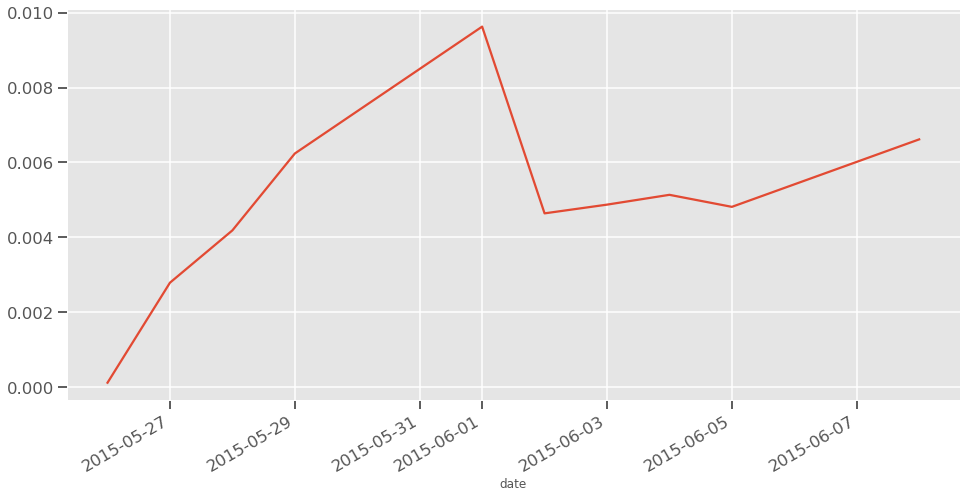

In [40]:
pnl['daily_pnl'].cumsum().plot()

In [35]:
pnl

,daily_pnl,daily_transaction_cost,daily_total,total
date,,,,
2015-05-26 00:00:00+00:00,-0.00274967,0.00484007,-0.00758974,-0.00758974
2015-05-27 00:00:00+00:00,NaN,NaN,NaN,NaN
2015-05-28 00:00:00+00:00,NaN,NaN,NaN,NaN
2015-05-29 00:00:00+00:00,NaN,NaN,NaN,NaN
2015-06-01 00:00:00+00:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2015-12-21 00:00:00+00:00,NaN,NaN,NaN,NaN
2015-12-22 00:00:00+00:00,NaN,NaN,NaN,NaN
2015-12-23 00:00:00+00:00,NaN,NaN,NaN,NaN
